<a href="https://colab.research.google.com/github/The-Kaggle-Crew-18/Kaggle-Challenge-18/blob/Model-Building/KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problem Statement
The goal of the Kaggle Spaceship Titanic challenge is to predict which passengers were transported to an alternate dimension during the spaceship Titanic's collision with a spacetime anomaly. Using the provided datasets, we will build a machine learning model to accurately classify whether a passenger was transported or not based on various features such as age, cabin, destination, etc.

#1.2 Introduction to the Dataset
train.csv: This dataset contains the training data with features such as PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, and whether the passenger was transported (Transported).
test.csv: This dataset contains similar features as train.csv but without the target variable (Transported). We will use this data to make predictions.
sample_submission.csv: This file provides the format for the submission. It includes PassengerId and a column for our predictions (Transported).

#1.3 Overview of the Kaggle Challenge
The Kaggle Spaceship Titanic challenge aims to classify whether passengers were transported to an alternate dimension. The objective is to build a machine learning model that accurately predicts the target variable (Transported). The competition uses accuracy as the evaluation metric, where submissions are scored based on the percentage of correctly classified passengers.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
# Loading the datasets

train_data = 'https://raw.githubusercontent.com/The-Kaggle-Crew-18/Kaggle-Challenge-18/main/train.csv'
test_data = 'https://raw.githubusercontent.com/The-Kaggle-Crew-18/Kaggle-Challenge-18/main/test.csv'


train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [4]:
# Display the first few rows of the dataset
print("Train Dataset:")
train_df.head()

Train Dataset:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 2.1 Initial Data Exploration
The structure and overview of the data (columns, types, etc.). Generating summary statistics for the datasets and Checking the missing values in the datasets.

In [5]:
# Structure and overview of the data
print("Train Dataset Info:")
train_df.info()
print("\nTest Dataset Info:")
test_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colum

In [6]:
# Summary statistics
print("Train Dataset Summary Statistics:")
train_df.describe()


Train Dataset Summary Statistics:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
print("\nTest Dataset Summary Statistics:")
test_df.describe()


Test Dataset Summary Statistics:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [8]:
# Checking for missing values
print("Missing Values in Train Dataset:")
train_df.isnull().sum()

Missing Values in Train Dataset:


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Checking for missing values in the test data
print("\nMissing Values in Test Dataset:")
test_df.isnull().sum()


Missing Values in Test Dataset:


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

##3.1 Data Cleaning
Handle missing values, duplicates, and perform any necessary normalization or scaling.
Handle missing values in the train and test datasets. Normalize/scale the data if necessary.

In [10]:
# Handling missing values
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

# Checking for duplicates
print("Duplicate entries in train dataset:", train_df.duplicated().sum())
print("Duplicate entries in test dataset:", test_df.duplicated().sum())

# Normalization/Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']



Duplicate entries in train dataset: 0
Duplicate entries in test dataset: 0


In [11]:
#Normalization of Training data and it's result
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
# Verifying the changes
print("Train Dataset after preprocessing:")
train_df.head()

Train Dataset after preprocessing:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.702706,False,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,-0.332151,False,-0.173954,-0.279615,-0.245435,0.209599,-0.226562,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,2.013525,True,-0.273478,1.934223,-0.287182,5.640434,-0.222209,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.288763,False,-0.338320,0.511086,0.332339,2.658143,-0.096860,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.884075,False,0.118586,-0.241756,-0.035032,0.223691,-0.263122,Willy Santantines,True


In [12]:
#Normalization of Test data and it's result
test_df[numerical_features] = scaler.transform(test_df[numerical_features])
print("\nTest Dataset after preprocessing:")
test_df.head()


Test Dataset after preprocessing:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,-0.125180,False,-0.33832,-0.285201,-0.287182,-0.273944,-0.264863,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,-0.677103,False,-0.33832,-0.279615,-0.287182,2.212473,-0.264863,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.150782,False,-0.33832,-0.285201,-0.287182,-0.273944,-0.264863,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.633715,False,-0.33832,3.843326,-0.287182,-0.114525,0.244369,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,-0.608113,False,-0.32324,-0.285201,0.773183,-0.273944,-0.264863,Brence Harperez


# **3.2 Feature Engineering**
Creattion of new features and transforming existing features to enhance the model’s performance.



In [13]:
# Creating new features
train_df['TotalSpent'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalSpent'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

# Transforming existing features (extracting deck and room number from Cabin)
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

In [14]:
# Verifying the changes for training set
print("Train Dataset with new features:")
train_df.head()


Train Dataset with new features:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,0.702706,False,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,Maham Ofracculy,False,-1.449509,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,-0.332151,False,-0.173954,-0.279615,-0.245435,0.209599,-0.226562,Juanna Vines,True,-0.715967,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,2.013525,True,-0.273478,1.934223,-0.287182,5.640434,-0.222209,Altark Susent,False,6.791788,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,0.288763,False,-0.338320,0.511086,0.332339,2.658143,-0.096860,Solam Susent,False,3.066387,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,-0.884075,False,0.118586,-0.241756,-0.035032,0.223691,-0.263122,Willy Santantines,True,-0.197632,F,1,S


In [15]:
# Verifying the changes for test set
print("\nTest Dataset with new features:")
test_df.head()


Test Dataset with new features:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpent,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,-0.125180,False,-0.33832,-0.285201,-0.287182,-0.273944,-0.264863,Nelly Carsoning,-1.449509,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,-0.677103,False,-0.33832,-0.279615,-0.287182,2.212473,-0.264863,Lerome Peckers,1.042493,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.150782,False,-0.33832,-0.285201,-0.287182,-0.273944,-0.264863,Sabih Unhearfus,-1.449509,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.633715,False,-0.33832,3.843326,-0.287182,-0.114525,0.244369,Meratz Caltilter,3.347668,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,-0.608113,False,-0.32324,-0.285201,0.773183,-0.273944,-0.264863,Brence Harperez,-0.374065,F,5,S


# Section 4: Exploratory Data Analysis (EDA)
##4.1 Summary Statistics
Generate and review summary statistics for the datasets to understand the distribution and characteristics of the data.



In [16]:
# Summary statistics for the train dataset
print("Summary Statistics for the Train Dataset:")
train_df.describe()

Summary Statistics for the Train Dataset:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-1.160670e-16,-1.123888e-17,3.432968e-17,2.860807e-17,-2.452120e-17,4.924675e-17,1.344579e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,2.489561e+00
min,-1.987922e+00,-3.383199e-01,-2.852012e-01,-2.871816e-01,-2.739442e-01,-2.648627e-01,-1.449509e+00
25%,-6.771033e-01,-3.383199e-01,-2.852012e-01,-2.871816e-01,-2.739442e-01,-2.648627e-01,-1.449509e+00
50%,-1.251796e-01,-3.383199e-01,-2.852012e-01,-2.871816e-01,-2.739442e-01,-2.648627e-01,-7.655925e-01
75%,6.337155e-01,-2.659387e-01,-2.374115e-01,-2.437651e-01,-2.202172e-01,-2.265615e-01,3.306479e-01
max,3.462324e+00,2.126594e+01,1.821807e+01,3.894130e+01,1.946237e+01,2.074245e+01,3.832230e+01


In [17]:
# Summary statistics for the test dataset
print("Summary Statistics for the Test Dataset:")
test_df.describe()

Summary Statistics for the Test Dataset:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,-0.012024,-0.008667,-0.014639,0.008673,-0.007826,0.005382,-0.017077
std,0.980216,0.912118,0.941055,0.932320,0.976326,1.081888,2.468082
min,-1.987922,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,-1.449509
25%,-0.677103,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,-1.449509
50%,-0.194170,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,-0.775151
75%,0.564725,-0.259907,-0.238032,-0.230406,-0.228144,-0.233525,0.323955
max,3.462324,17.104028,15.400346,13.559345,17.204077,19.122483,25.915239


##4.2 Visualizations
Visualizations to explore the data and identify patterns, trends, and potential outliers.

Tasks:

Generate histograms for numerical features.
Create box plots for numerical features to identify outliers.
Generate scatter plots to examine relationships between features.
Create a correlation matrix to understand relationships between features.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics for the train dataset
print("Summary Statistics for the Train Dataset:")
print(train_df.describe())

# Summary statistics for the test dataset
print("Summary Statistics for the Test Dataset:")
print(test_df.describe())



Summary Statistics for the Train Dataset:
                Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8.693000e+03  8.693000e+03  8.693000e+03  8.693000e+03  8.693000e+03   
mean  -1.160670e-16 -1.123888e-17  3.432968e-17  2.860807e-17 -2.452120e-17   
std    1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00   
min   -1.987922e+00 -3.383199e-01 -2.852012e-01 -2.871816e-01 -2.739442e-01   
25%   -6.771033e-01 -3.383199e-01 -2.852012e-01 -2.871816e-01 -2.739442e-01   
50%   -1.251796e-01 -3.383199e-01 -2.852012e-01 -2.871816e-01 -2.739442e-01   
75%    6.337155e-01 -2.659387e-01 -2.374115e-01 -2.437651e-01 -2.202172e-01   
max    3.462324e+00  2.126594e+01  1.821807e+01  3.894130e+01  1.946237e+01   

             VRDeck    TotalSpent  
count  8.693000e+03  8.693000e+03  
mean   4.924675e-17  1.344579e-16  
std    1.000058e+00  2.489561e+00  
min   -2.648627e-01 -1.449509e+00  
25%   -2.648627e-01 -1.449509e+00  
50%   -2.648627e-01 -7.655925e

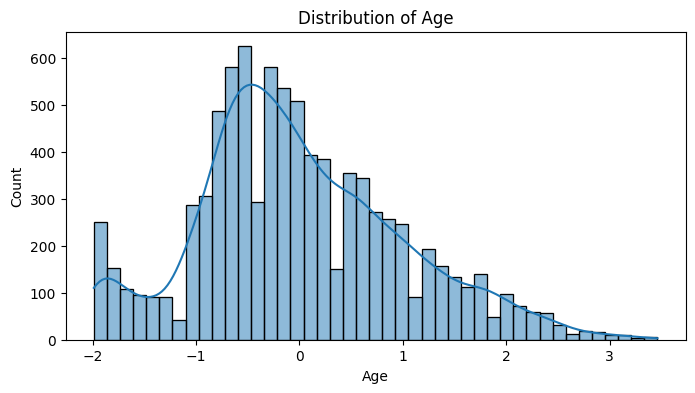

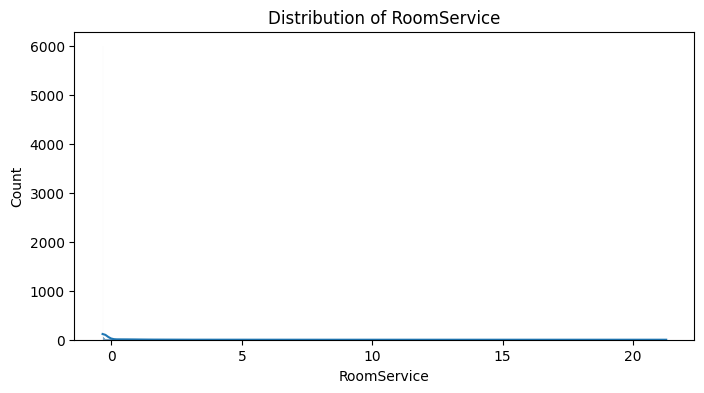

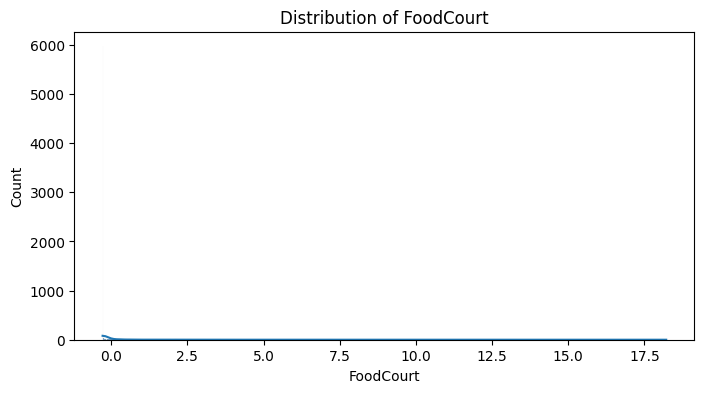

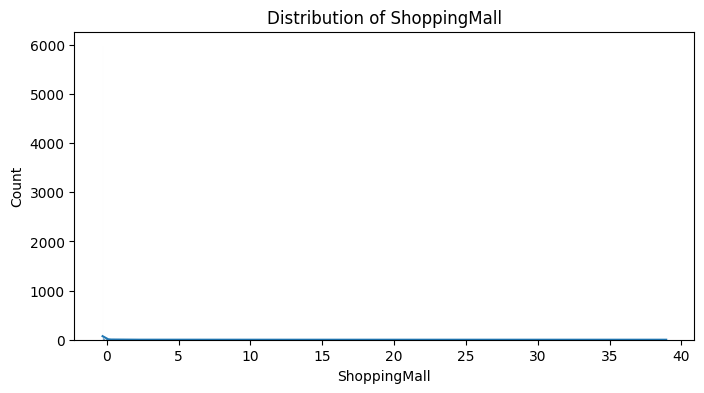

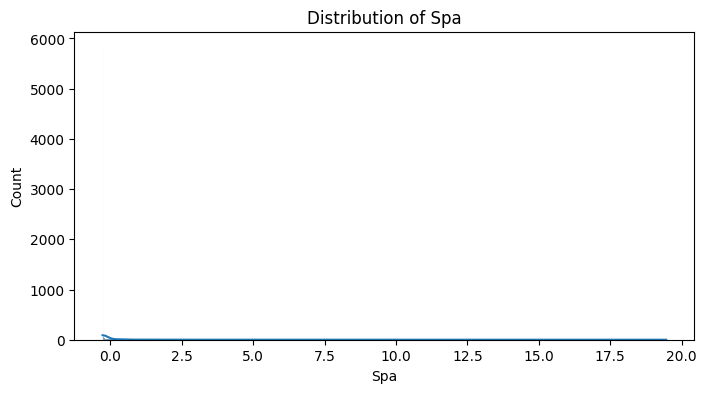

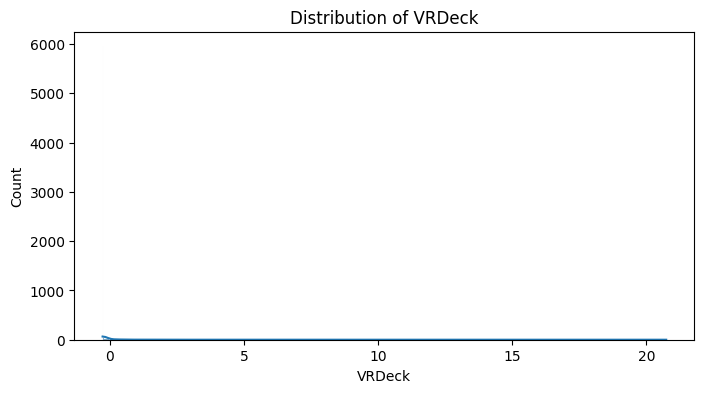

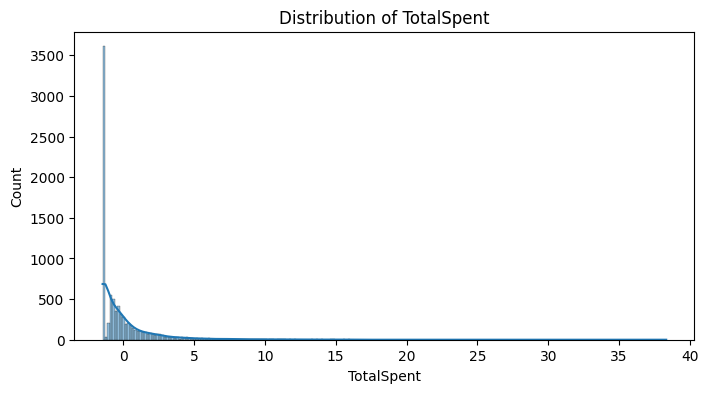

In [19]:
# Histograms for numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
for feature in numerical_features:
    if feature in train_df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(train_df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()



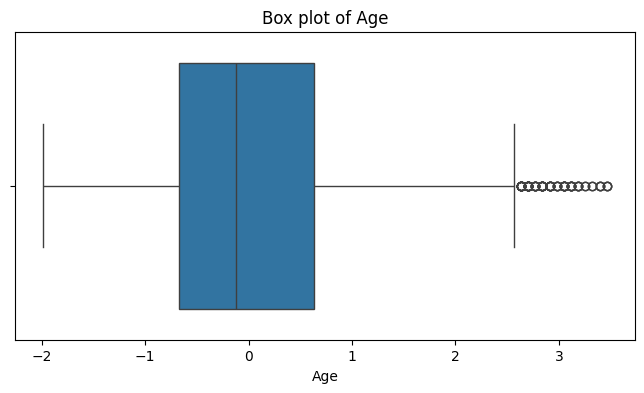

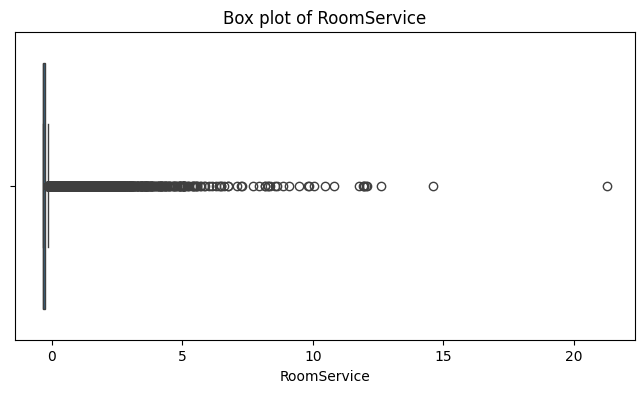

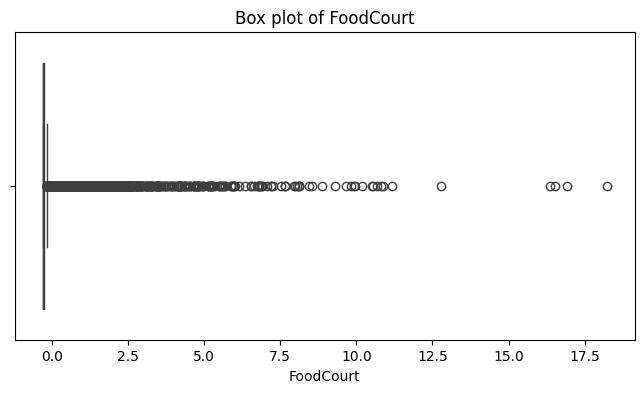

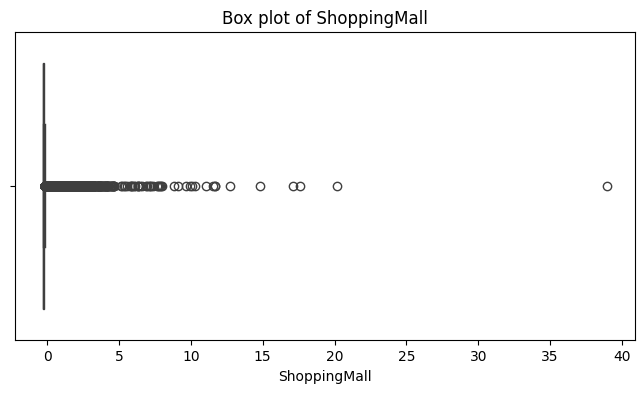

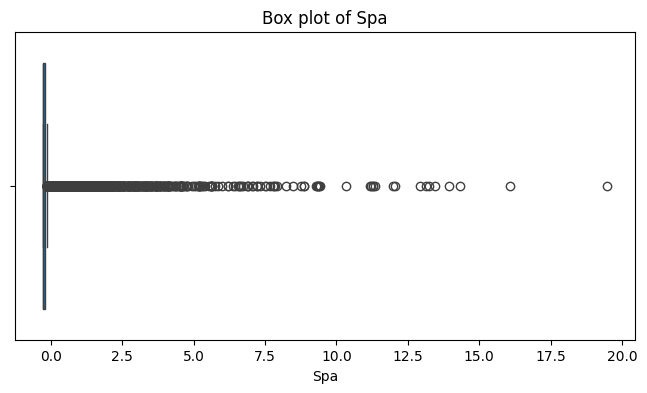

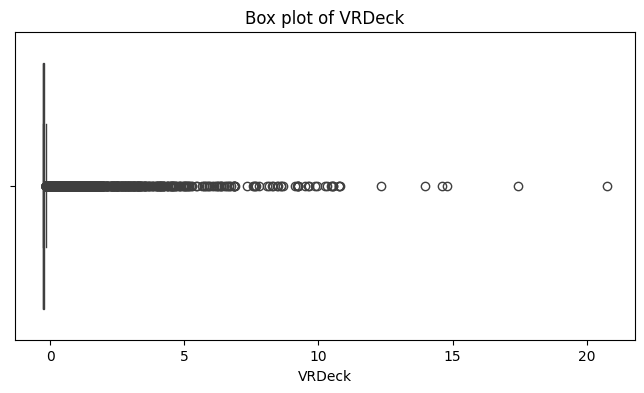

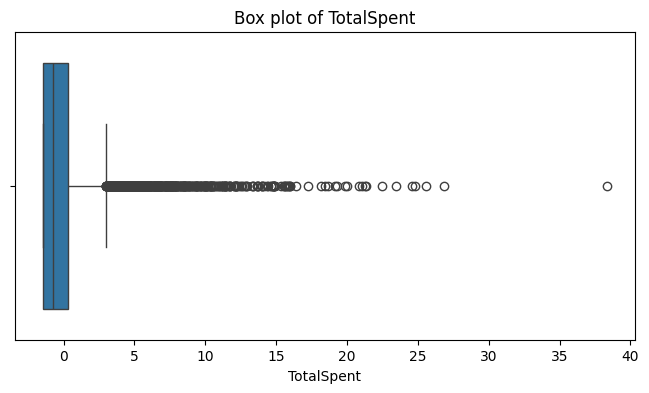

In [21]:
# Box plots for numerical features
for feature in numerical_features:
    if feature in train_df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=train_df[feature])
        plt.title(f'Box plot of {feature}')
        plt.show()



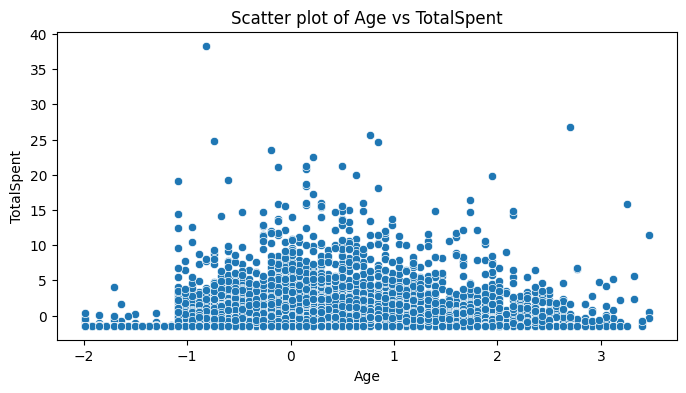

In [ ]:
# Scatter plots to examine relationships between features
if 'Age' in train_df.columns and 'TotalSpent' in train_df.columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='Age', y='TotalSpent', data=train_df)
    plt.title('Scatter plot of Age vs TotalSpent')
    plt.show()




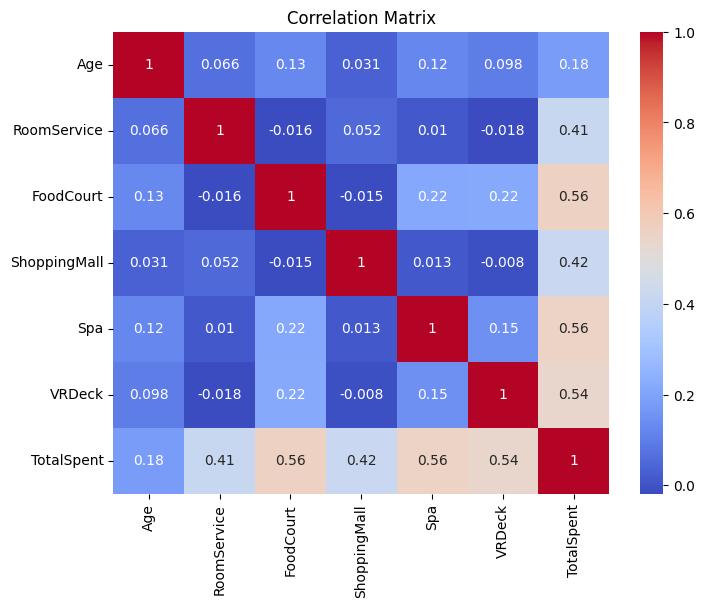

In [22]:
# Selecting only numerical features for correlation matrix
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']
numerical_features = [feature for feature in numerical_features if feature in train_df.columns]

# Correlation matrix
if numerical_features:
    plt.figure(figsize=(8, 6))
    correlation_matrix = train_df[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Select features and target
X = train_df.drop(['Transported'], axis=1)
y = train_df['Transported'].astype(int)  # Ensure target is numerical

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=[np.number]).columns

# Create a preprocessor for handling categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Logistic Regression Pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [26]:
 # Train and evaluate Logistic Regression
log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_log_reg))

Logistic Regression Accuracy: 0.7711328349626222
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       861
           1       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

